In [1]:
import os
import matplotlib.pyplot as plt
import SimpleITK as sitk
import numpy as np

from allensdk.brain_observatory.behavior.behavior_ophys_session import BehaviorOphysSession

%matplotlib notebook

# Visual Behavior (Ophys) Session

The `BehaviorOphysSession` class in `allensdk.brain_observatory.behavior.behavior_ophys_session` provides an interface to all of the data for a single experimental session from the Visual Behavior pipeline, aligned to a common clock. This notebook will show you how to use the `BehaviorOphysSession` class to access data from a session.

### Obtaining a `BehaviorOphysSession`

We package each session's data into a Neurodata Without Borders 2.0 (NWB) file. If you have local access to such a file, you can build an `BehaviorOphysSession` object for accessing the data within that file. The `BehaviorOphysSession` will load data from the NWB file on-demand and cache it in memory using the methods defined in the `BehaviorOphysNwbApi` class.  This is an example of a "dependency injection" pattern; the dependency necessary to go and fetch the data (here the `api` kwarg) is injected into the session object, which uses the methods on the api to populate the session attributes on-demand.

In [2]:
full_filepath = os.path.join(
    "/",
    "allen",
    "programs",
    "braintv",
    "production",
    "visualbehavior",
    "prod0",
    "specimen_830940327",
    "ophys_session_878436988",
    "ophys_experiment_879332693",
    "behavior_ophys_session_879332693.nwb"
)
session = BehaviorOphysSession.from_nwb_path(full_filepath)

# Available lazy-loading attributes:

#### Metadata:
```python
session.ophys_experiment_id
session.metadata
session.task_parameters
```

#### Running Speed:
```python
session.running_speed
session.running_data_df
```

#### 2-D images:
```python
session.max_projection
session.average_projection
session.segmentation_mask_image
session.stimulus_templates
```

#### Timestamps:
```python
session.stimulus_timestamps
session.ophys_timestamps
```

#### Primary DataFrames:
```python
session.dff_traces
session.licks
session.rewards
session.cell_specimen_table
session.stimulus_presentations
session.trials
```

#### Running Speed:
```python
session.running_speed
```

#### Auxiliary DataFrames:
```python
session.corrected_fluorescence_traces
session.motion_correction
session.running_data_df
```

### Metadata:

In [3]:

print(session.ophys_experiment_id)
print()
for key, val in session.metadata.items():
    print('{}: {}'.format(key, val))
print()
for key, val in session.task_parameters.items():
    print('{}: {}'.format(key, val))

879332693

session_type: Unknown
indicator: GCAMP6f
LabTracks_ID: 449441
imaging_depth: 175
field_of_view_width: 452
excitation_lambda: 910.0
field_of_view_height: 512
rig_name: CAM2P.3
sex: M
reporter_line: ['Ai93(TITL-GCaMP6f)']
age: unknown
behavior_session_uuid: 3a676ad1-693d-4658-9881-6bade2b13aab
stimulus_frame_rate: 60.0
experiment_container_id: 876693090
driver_line: ['Camk2a-tTA', 'Slc17a7-IRES2-Cre']
ophys_frame_rate: 31.0
full_genotype: Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/wt
targeted_structure: VISp
ophys_experiment_id: 879332693
emission_lambda: 520.0
experiment_datetime: 2019-05-31 08:54:45+00:00

n_stimulus_frames: 69599
stage: OPHYS_1_images_A
stimulus_distribution: geometric
response_window_sec: [0.15, 0.75]
stimulus_duration_sec: 6.0
omitted_flash_fraction: nan
stimulus: images
reward_volume: 0.007
blank_duration_sec: [0.5, 0.5]
task: DoC_untranslated


### Primary DataFrames:

In [4]:
print(session.dff_traces.head())
print(session.licks.head())
print(session.rewards.head())

                  cell_roi_id  \
cell_specimen_id                
879381164           879394426   
879381634           879394428   
877720775           879394431   
877717367           879394435   
877717665           879394445   

                                                                dff  
cell_specimen_id                                                     
879381164         [0.29148398672449266, 0.23553465744711322, 0.2...  
879381634         [0.32525907718633756, 0.4744012352181941, 0.47...  
877720775         [0.3005878990109885, 0.0, 0.26076778510835097,...  
877717367         [0.2770539320966484, 0.18276958433088994, 0.25...  
877717665         [0.7203429549939218, 0.49700447980273166, 0.36...  
      time
0  0.36147
1  0.54410
2  1.20987
3  1.33161
4  1.48846
            volume  autorewarded
timestamps                      
331.830304   0.005         False
345.349249   0.005         False
355.099053   0.005         False
362.609135   0.005         False
379.118821   0

In [5]:
for col in session.cell_specimen_table.columns:
    print(col)
session.cell_specimen_table.head()

cell_roi_id
height
image_mask
mask_image_plane
max_correction_down
max_correction_left
max_correction_right
max_correction_up
valid_roi
width
x
y


,cell_roi_id,height,image_mask,mask_image_plane,max_correction_down,max_correction_left,max_correction_right,max_correction_up,valid_roi,width,x,y
cell_specimen_id,,,,,,,,,,,,
879381164,879394426,15,"[[False, False, False, False, False, False, Fa...",1,6.23717,4.81655,29.9529,18.5363,True,19,271.0,21.0
879381634,879394428,22,"[[True, True, False, False, False, False, Fals...",1,6.23717,4.81655,29.9529,18.5363,True,19,44.0,15.0
877720775,879394431,19,"[[False, False, False, True, False, False, Fal...",1,6.23717,4.81655,29.9529,18.5363,True,13,294.0,19.0
877717367,879394435,20,"[[False, False, False, False, False, False, Fa...",1,6.23717,4.81655,29.9529,18.5363,True,18,185.0,8.0
877717665,879394445,19,"[[False, False, False, True, True, True, True,...",2,6.23717,4.81655,29.9529,18.5363,True,18,55.0,329.0


In [6]:
print(f"{session.cell_specimen_table.shape[0]} distinct cells")
print(f"{session.dff_traces.shape[0]} dff traces")
print(f"{session.corrected_fluorescence_traces.shape[0]} fluorescence traces")

386 distinct cells
386 dff traces
386 fluorescence traces


In [7]:
session.stimulus_presentations.head()

,duration,end_frame,image_index,image_name,image_set,index,omitted,orientation,start_frame,start_time,stop_time
stimulus_presentations_id,,,,,,,,,,,
0,0.24994,18002.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,0,False,NaN,17987,307.55323,307.80317
1,0.24967,18047.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,1,False,NaN,18032,308.30351,308.55318
2,0.24980,18092.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,2,False,NaN,18077,309.05347,309.30327
3,0.24969,18137.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,3,False,NaN,18122,309.80344,310.05313
4,0.24991,18182.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,4,False,NaN,18167,310.55320,310.80311


In [8]:
for col in session.trials.columns:
    print(col)
session.trials.head()

start_time
stop_time
trial_length
catch
auto_rewarded
go
lick_times
aborted
reward_volume
hit
false_alarm
correct_reject
response_time
miss
reward_times
sham_change
stimulus_change
change_time
response_latency
initial_image_name
change_image_name


,start_time,stop_time,trial_length,catch,auto_rewarded,go,lick_times,aborted,reward_volume,hit,...,correct_reject,response_time,miss,reward_times,sham_change,stimulus_change,change_time,response_latency,initial_image_name,change_image_name
trials_id,,,,,,,,,,,,,,,,,,,,,
0,307.502673,307.936129,0.433457,False,True,False,[307.61362],True,0.0,False,...,False,NaN,False,[],False,False,NaN,NaN,im065,im065
1,308.253151,308.553604,0.300454,False,True,False,[],True,0.0,False,...,False,NaN,False,[],False,False,NaN,NaN,im065,im065
2,309.004049,311.255499,2.251450,False,True,False,[310.92321],True,0.0,False,...,False,NaN,False,[],False,False,NaN,NaN,im065,im065
3,311.256038,311.839316,0.583278,False,True,False,"[311.31395, 311.5141]",True,0.0,False,...,False,NaN,False,[],False,False,NaN,NaN,im065,im065
4,312.006205,312.406706,0.400501,False,True,False,[312.07931],True,0.0,False,...,False,NaN,False,[],False,False,NaN,NaN,im065,im065


### 2-D images:

Natural_Images_Lum_Matched_set_training_2017.07.14_2 (8, 918, 1174)


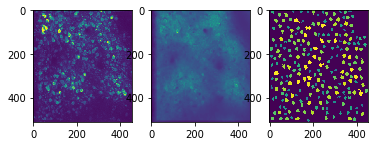

In [9]:
for key, val in session.stimulus_templates.items():
    print(key, val.shape)
fig, ax = plt.subplots(1, 3)
ax[0].imshow(sitk.GetArrayFromImage(session.max_projection))
ax[1].imshow(sitk.GetArrayFromImage(session.average_projection))
ax[2].imshow(sitk.GetArrayFromImage(session.segmentation_mask_image))


### Running Speed:

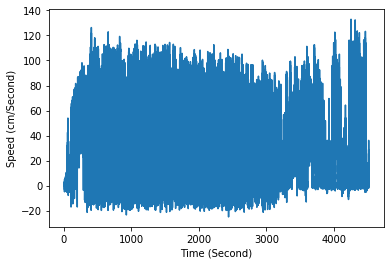

In [10]:
plt.plot(session.running_speed.timestamps, session.running_speed.values)
_ = plt.xlabel('Time (Second)')
_ = plt.ylabel('Speed (cm/Second)')

### Auxiliary DataFrames:

In [11]:
session.corrected_fluorescence_traces.head()

,cell_roi_id,corrected_fluorescence
cell_specimen_id,,
879381164,879394426,"[11359.658486834263, 11123.823256193144, 11414..."
879381634,879394428,"[9453.210976234192, 10703.776449263374, 10842...."
877720775,879394431,"[8717.504172853956, 7580.361953040605, 8874.96..."
877717367,879394435,"[5243.790500471761, 5061.838261996183, 5373.68..."
877717665,879394445,"[10095.635002518848, 9073.567577568127, 8562.2..."


In [12]:
session.running_data_df.head()

,speed,dx,v_sig,v_in
timestamps,,,,
7.52276,1.672134,27.491024,3.771535,5.001361
7.54816,2.959678,0.442183,3.776702,5.000070
7.55816,2.627385,0.535446,3.783162,4.998778
7.57805,0.995678,0.208640,3.787037,5.000070
7.59842,1.508139,0.208532,3.790913,5.001361


In [13]:
session.motion_correction.head()

,x,y
0,0.839530,-1.037380
1,0.329303,-0.375042
2,0.316216,-0.497833
3,1.011420,-1.547620
4,-0.704164,-1.405470


### Analysis Functions: Example

The goal of this section is to provide an example of how to define a set of function to achieve an analysis goal, that can easily be rolled into a package and made robust.

In [14]:
def cut_trace(start_time, stop_time, timestamps, values):
    inds = np.nonzero(np.logical_and(timestamps>start_time, timestamps<stop_time))
    return values[inds]

The function `cut trace` exemplifies some of the desirable qualities of a reusable function: it does one thing, and does it well: 
- The name of the function describes its purpose
- The input arguments are relatively simple, making it easy to unit-test
- The function performs one (non-trivial) conceptual operation on its inputs, while not mutating them in the process (i.e. no side-effects)
- The function returns one output
- The implementation is relatively easy to understand by simply reading the code:

In [15]:
def get_dff_by_epoch(epoch, session=None, cell_specimen_id=None):
    timestamps = session.ophys_timestamps[:]
    values = session.dff_traces['dff'].loc[cell_specimen_id]
    return cut_trace_by_epoch(epoch, timestamps, values)

The function `get_dff_by_epoch` uses assumptions about one of its arguments (session has property ophys_timestamps and dff_traces, for example) to reorganize the source data structure to for expected by `cut_trace_by_epoch`.  Next re apply this function across every row of a dataframe:

In [16]:
def cut_trace_by_epoch(epoch, timestamps, values):
    return cut_trace(epoch.start_time, epoch.stop_time, timestamps, values)

class Epoch:
    
    def __init__(self, start_time, stop_time):
        self.start_time = start_time
        self.stop_time = stop_time
        
e = Epoch(100, 100.25)
cell_specimen_id = 879381164  # for example

get_dff_by_epoch(e, session, cell_specimen_id=cell_specimen_id)

array([0.02164315, 0.10604059, 0.04811044, 0.03316068, 0.0726552 ,
       0.04648706, 0.12563211, 0.0246413 ])

The `cut_trace_by_epoch` function acts as an *interface adapter*, allowing any object that implements the `start_time` and `stop_time` attributes to take advantage of `cut_traces` implementation.

Here we use `cut_trace_by_epoch` to compute mean running speed per-trial. This works because the `session.trials` table has two columns named `start_time` and `stop_time`, and the `iterrows` generator emits an object that has these attributes:

In [17]:
for trial_index, row in session.trials.head().iterrows():
    cut_running_speed = cut_trace_by_epoch(row, session.running_speed.timestamps, session.running_speed.values)
    print('trial {}: mean_speed = {:5.2f}'.format(trial_index, cut_running_speed.mean()))

trial 0: mean_speed = -0.93
trial 1: mean_speed =  0.43
trial 2: mean_speed =  9.47
trial 3: mean_speed =  1.98
trial 4: mean_speed =  3.95


In [18]:
dff_series = session.trials.head().apply(get_dff_by_epoch, axis=1, session=session, cell_specimen_id=cell_specimen_id)

In [19]:
def ragged_average(series):
    
    nr = len(series)
    nc = max([len(arr) for arr in series.values])

    x = np.empty((nr, nc))
    x.fill(np.nan)
    for ri in range(nr):
        data = series.iloc[ri]
        x[ri,:len(data)] = data
            
    return np.nanmean(x, axis=0)

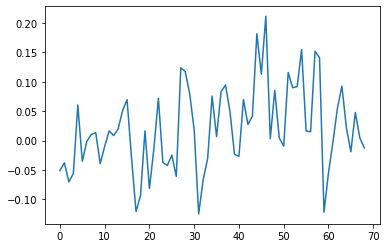

In [20]:
mean_dff = ragged_average(dff_series)
_ = plt.plot(mean_dff)

### Exercise:

1. **Work with a partner** (preferably someone you have never worked with before) to use:
```python
cut_trace
cut_trace_by_epoch
get_dff_by_epoch
ragged_average
```
to build a dataframe containing one feature column called mean_dff (each row is an array), and as many other feature columns as you need that encode various conditions of interest. For example:
  - `[mean_dff, hit]` where `hit` is a boolean encoding of trial
  - `[mean_dff, cell_specimen_id]`
  - `[mean_dff, stage]` where `stage` is pulled from session.task_parameters, across multiple session 
As you build this dataframe, think about the modularity of your code, and packaging subfunctions that might be reusable by others.
2. Do some analysis with this dataframe (time permitting)
3. Prepare a 30 second data blast about what features you worked to incorporate, and what analysis you started to tackle with this exercise, that you can present to the group.  No slide or figures necessary, just talking.